## Analysis of frequent words in Reviews

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
from utils import read_json_file, get_all_text_data

In [3]:
reviews =  read_json_file(path="../data/reviews.json")

In [4]:
text_rating = get_all_text_data(reviews['data'], rating=True)
text, rating = zip(*text_rating)
rating_text_dict = {key:[] for key in list(set(rating))}

for text, rating in text_rating:
    rating_text_dict[rating].append(text)

100%|██████████| 855/855 [00:00<00:00, 223379.22it/s]


In [5]:
from collections import defaultdict
def get_nouns_by_freq(rating_text_dict,nlp,rating_value):
    texts = rating_text_dict[rating_value]
    docs = [nlp(text) for text in texts]

    freq_nouns = defaultdict(int)
    associated_adjectives = defaultdict(list)

    for doc in docs:
        for token in doc:
            if not (token.is_stop or token.is_punct) and token.pos_=="NOUN":
                freq_nouns[token.lemma_]+=1
                for child in token.children:
                    if not (child.is_punct or child.is_stop) and child.pos_ == 'ADJ':
                        associated_adjectives[token.lemma_].append(child.lemma_)

    sorted_nouns_by_freq = sorted(freq_nouns.items(), key = lambda x:x[1], reverse = True)
    words, frequencies = zip(*sorted_nouns_by_freq)

    return words, frequencies, associated_adjectives

In [10]:
import matplotlib.pyplot as plt
def plot_words_frequencies(words, frequencies, rating_value, top_n):
    plt.figure(figsize=(12, 8))
    plt.bar(words[:top_n], frequencies[:top_n], color='skyblue')

    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title(f'Top {top_n} Word Frequencies for Rating Value of {rating_value}')
    plt.xticks(rotation=90)  
    plt.tight_layout()

    plt.show()

In [34]:
from collections import Counter
def plot_associated_adjectives(parent_words,associated_adjectives,top_n=3):
    
    plt.figure(figsize=(16,4))
   

    for idx, word in enumerate(parent_words):
        all_child_words = associated_adjectives[word]
        if all_child_words==[]:
            continue
        sorted_freq_child_words = sorted(Counter(all_child_words).items(), key=lambda x:x[1], reverse=True)
        adjective_words, freq = zip(*sorted_freq_child_words)

        num_plots = top_n

        
        plt.subplot(1,4,idx+1)
        plt.bar(adjective_words[:top_n],freq[:top_n],color="purple")
        plt.xlabel("Words")
        plt.ylabel("Frequencies")
        plt.title(f"Top {top_n} word associated with {word}" )

In [35]:
def plots_for_all_rating(rating_text_dict=rating_text_dict, nlp=nlp, top_n=10, rating_values=[1,2,3,4,5]):
    for value in rating_values:
        words, frequencies, associated_adjectives = get_nouns_by_freq(rating_text_dict=rating_text_dict, nlp=nlp, rating_value=value)
        plot_words_frequencies(words=words, frequencies=frequencies, rating_value=value, top_n=top_n)
        print(associated_adjectives)
        plot_associated_adjectives(words[:4],associated_adjectives)
        

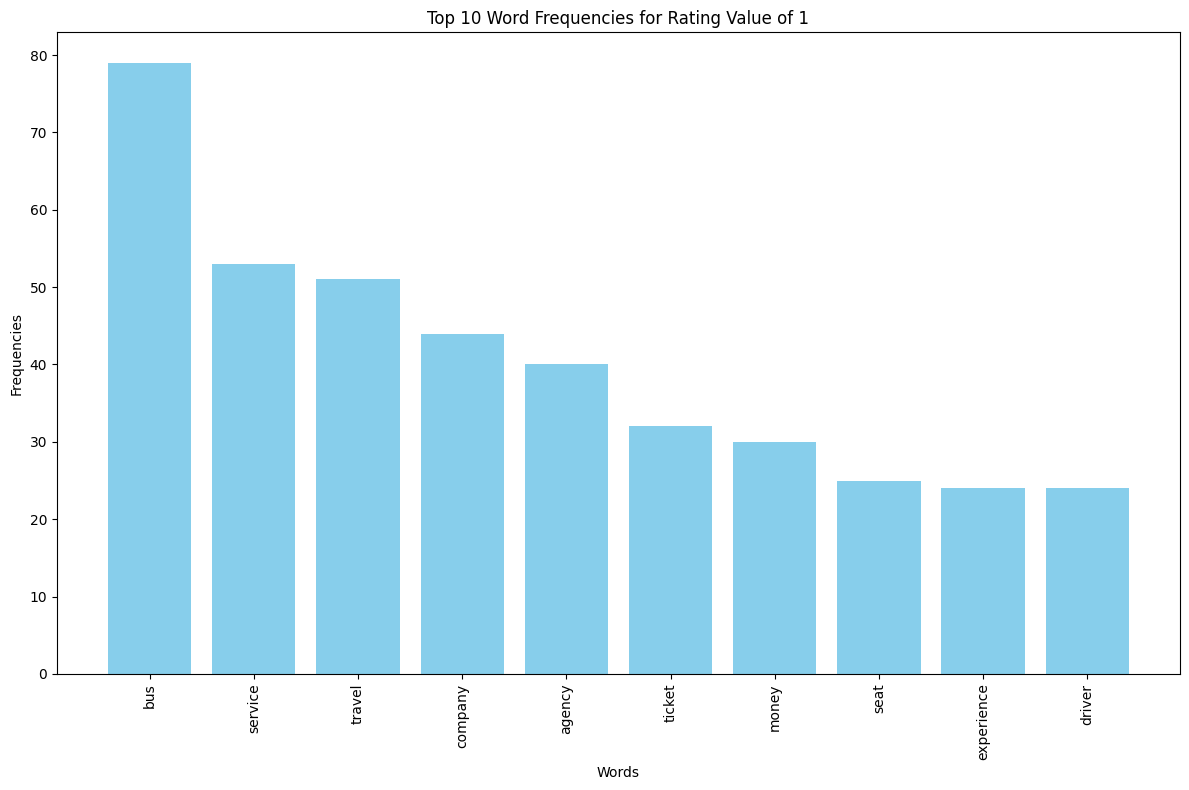

defaultdict(<class 'list'>, {'service': ['bad', 'bad', 'slow', 'bad', 'bad', 'bad', 'bad', 'poor', 'bad', 'awful', 'bad', 'good', 'bad', 'poor', 'good', 'bad', 'bad', 'good', 'bad', 'careless', 'slow', 'poor', 'poor', 'good', 'poor', 'bad', 'bad'], 'facility': ['good', 'poor'], 'agency': ['reliable', 'irresponsible', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'illegal', 'bad', 'bad', 'bad'], 'hotel': ['well', 'bad', 'good', 'deplorable', '3rd'], 'price': ['reasonable', 'fare', 'high'], 'experience': ['bad', 'bad', 'bad', 'entire', 'awful', 'awful', 'pleasurable', 'bad', 'bad', 'seamless', 'bad', 'bad', 'hectic', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'awful'], 'review': ['fake', 'previous', 'good'], 'place': ['good', 'bad', 'random'], 'communication': ['proper', 'proper'], 'time': ['bad', 'long', 'multiple', 'multiple'], 'response': ['bad'], 'check': ['double'], 'feedback': ['detailed'], 'charge': ['extra'], 'company': ['bad', 'sole', 'bad', 'bad', 'bad', 'bad'], 'rate': ['hi

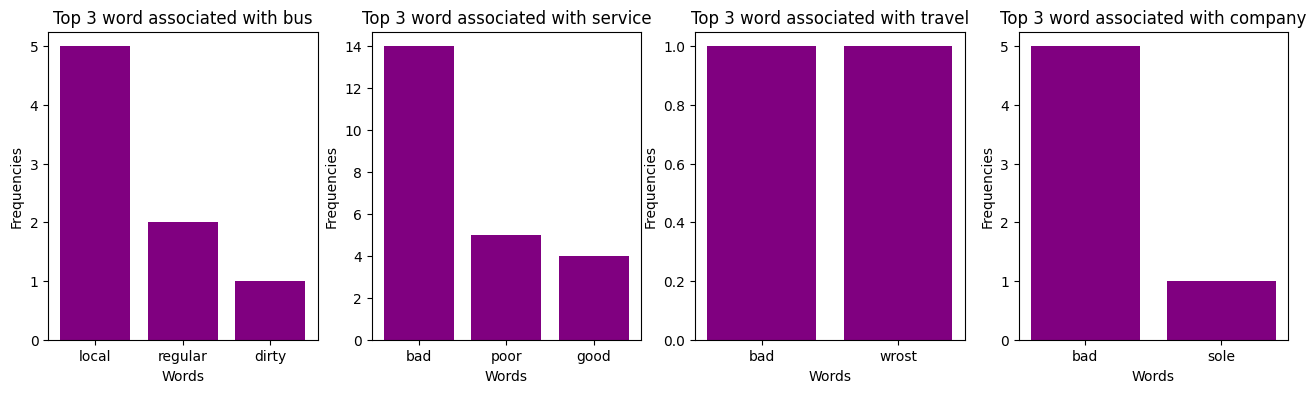

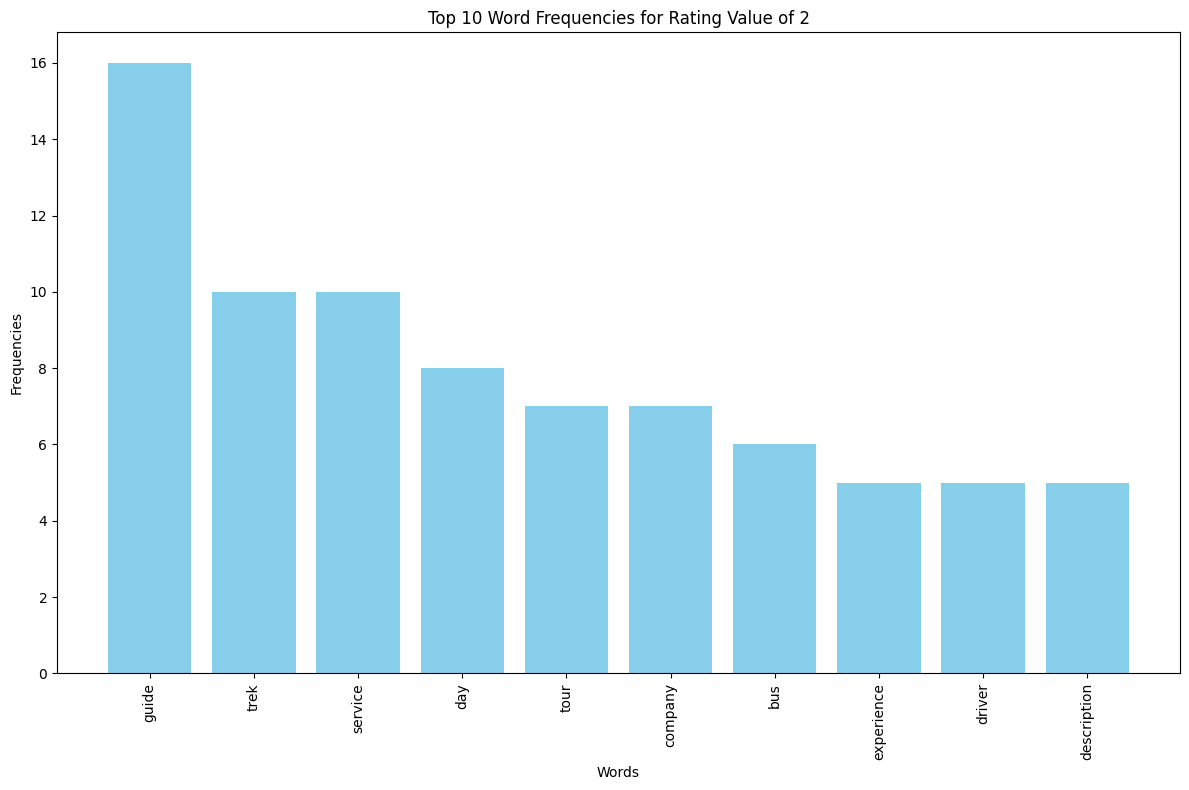

defaultdict(<class 'list'>, {'knowledge': ['necessary'], 'country': ['new'], 'altitude': ['high'], 'night': ['additional'], 'location': ['different'], 'boy': ['old'], 'processes-': ['unorganized'], 'comment': ['inappropriate'], 'experience': ['bad', 'good'], 'service': ['good', 'average', 'poor'], 'bus': ['local'], 'car': ['nice'], 'temple': ['shesnarayan', 'dakshinkali'], 'monument': ['giant'], 'number': ['large', 'large'], 'response': ['cooperative'], 'comfort': ['questionable'], 'communication': ['clear', 'difficult', 'hard'], 'thing': ['good'], 'people': ['ordinary'], 'company': ['real'], 'processing': ['normal'], 'day': ['express'], 'reason': ['personal'], 'sheet': ['handwritten'], 'date': ['incorrect'], 'trek': ['second'], 'route': ['alternative'], 'information': ['incorrect'], 'attempt': ['multiple'], 'leaking': ['old'], 'seat': ['comfortable'], 'burger': ['lousy'], 'music': ['loud', 'nepali'], 'movie': ['violent'], 'sound': ['loud'], 'price': ['high'], 'ride': ['quiet']})


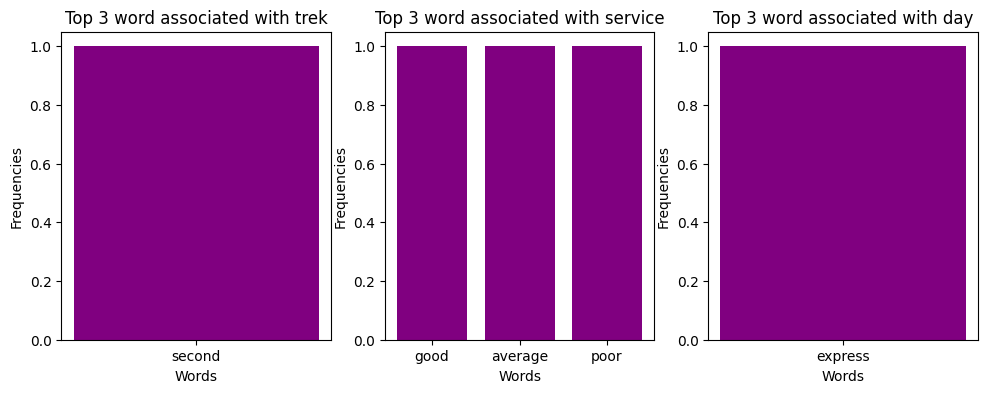

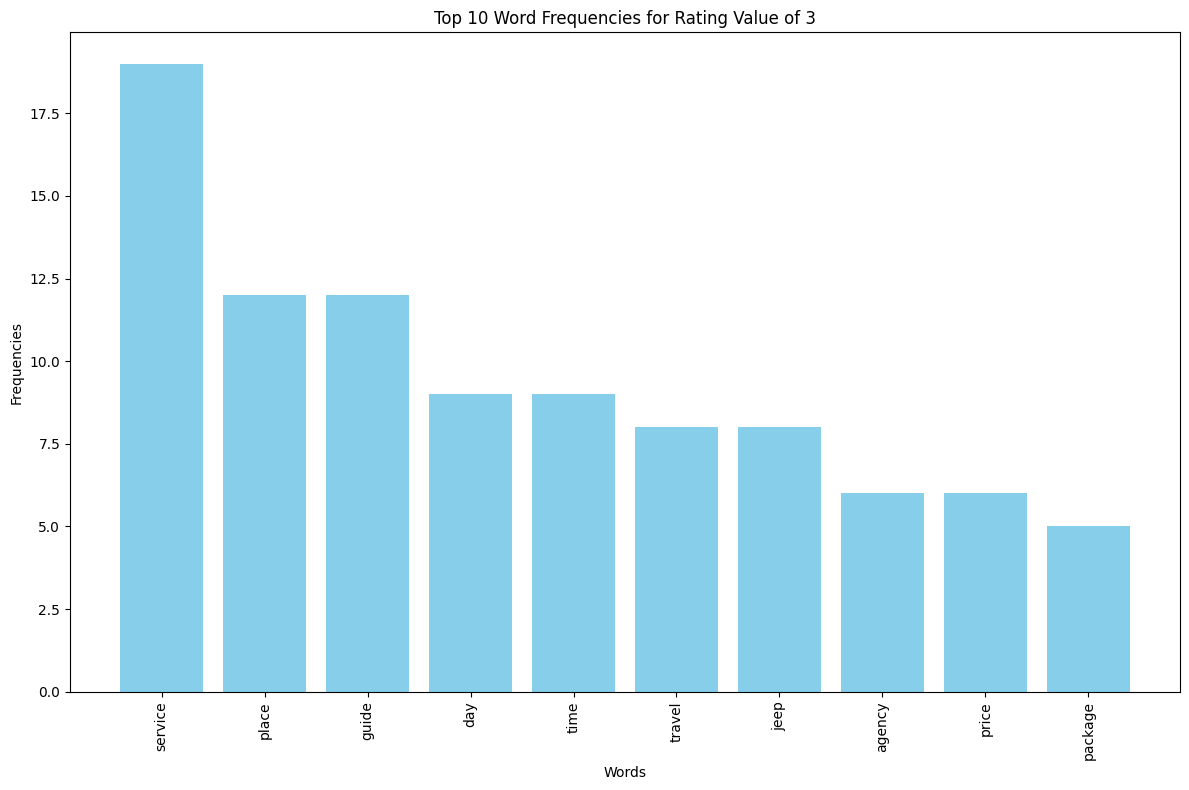

defaultdict(<class 'list'>, {'experience': ['bad', 'good', 'good', 'amazing'], 'place': ['nice', 'wrong', 'trustable', 'strange', 'conjusted', 'good', 'good'], 'work': ['good'], 'communication': ['good'], 'airport': ['small'], 'guy': ['rude'], 'agency': ['nepal'], 'price': ['reasonable', 'fair', 'cheap'], 'location': ['pickup', 'center'], 'hospital': ['dental'], 'pickup': ['actual'], 'journey': ['jeep', 'comfortable'], 'service': ['jeep', 'jeep', 'jeep', 'jeep', 'nice', 'nice', 'good', 'trourist', 'basic', 'good', 'quick'], 'ride': ['long'], 'road': ['bumpy'], 'capacity': ['maximum'], 'plan': ['jeep'], 'positive': ['jeep'], 'deal': ['fair'], 'trekker': ['single'], 'case': ['important'], 'guide': ['young', 'good', 'caring', 'english', 'tibetian', 'tibetian'], 'way': ['long', 'possible'], 'time': ['rute', 'multiple', 'stressful'], 'staff': ['educated'], 'ticket': ['sasto'], 'process': ['hard'], 'booking': ['online'], 'company': ['good'], 'group': ['small'], 'visa': ['chinese'], 'border':

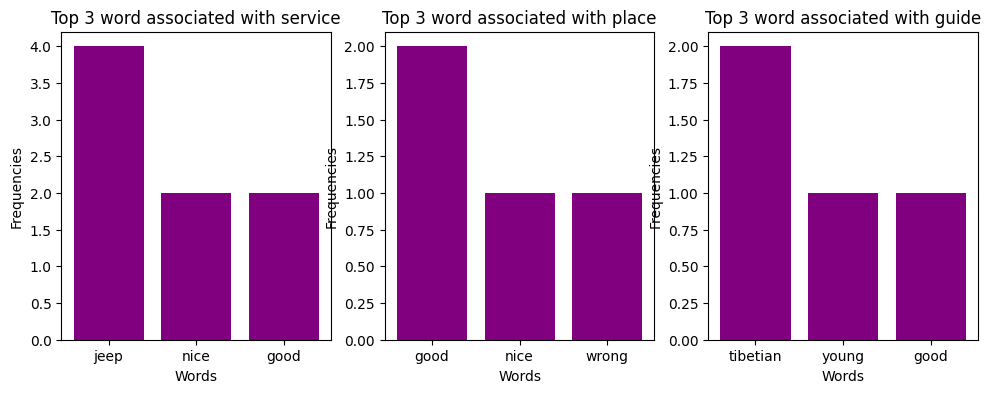

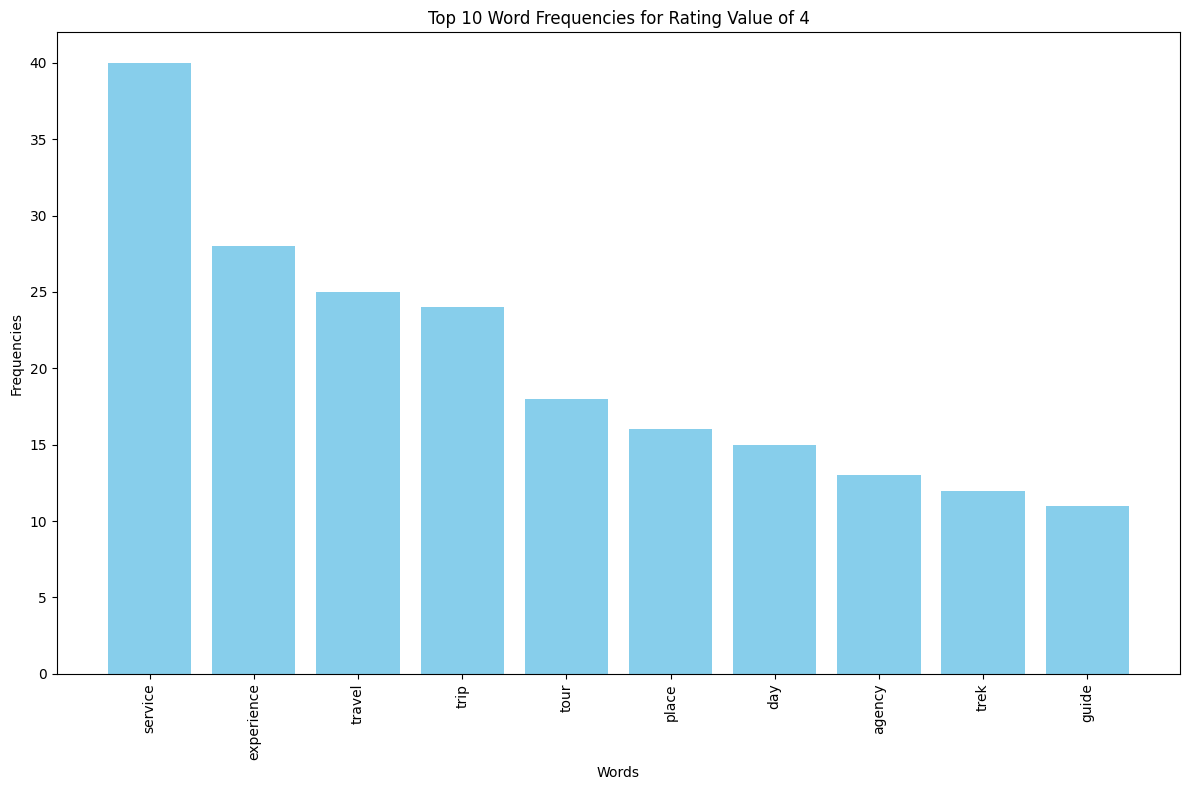

defaultdict(<class 'list'>, {'fare': ['reasonable', 'international'], 'team': ['friendly'], 'weather': ['bad'], 'airline': ['domestic', 'international'], 'transport': ['local'], 'trip': ['excellent', 'recent', 'nepal'], 'terrain': ['difficult'], 'professional': ['polite'], 'choice': ['good', 'good'], 'agency': ['great', 'reliable', 'great', 'comprehensive', 'good', 'small', 'good', 'good', 'good', 'good', 'good'], 'package': ['good', 'international', 'special'], 'place': ['nice', 'affordable', 'different', 'good', 'good', 'nice', 'nice', 'good', 'beautiful', 'good', 'famous', 'nice', 'beautiful', 'exotic', 'perfect'], 'service': ['good', 'good', 'online', 'fast', 'wonderful', 'professional', 'nice', 'excellent', 'exceptional', 'good', 'polite', 'prompt', 'nice', 'nice', 'great', 'great', 'exceptional', 'good', 'good', 'personalized', 'good', 'nice', 'overall', 'nice', 'comfortable', 'good'], 'adventure': ['recent', 'great'], 'experience': ['extensive', 'unforgettable', 'good', 'incredi

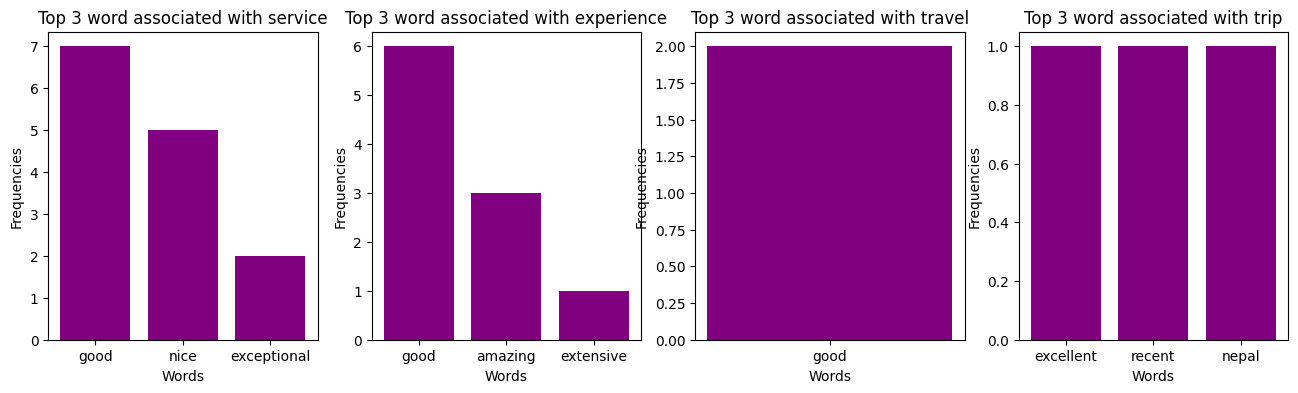

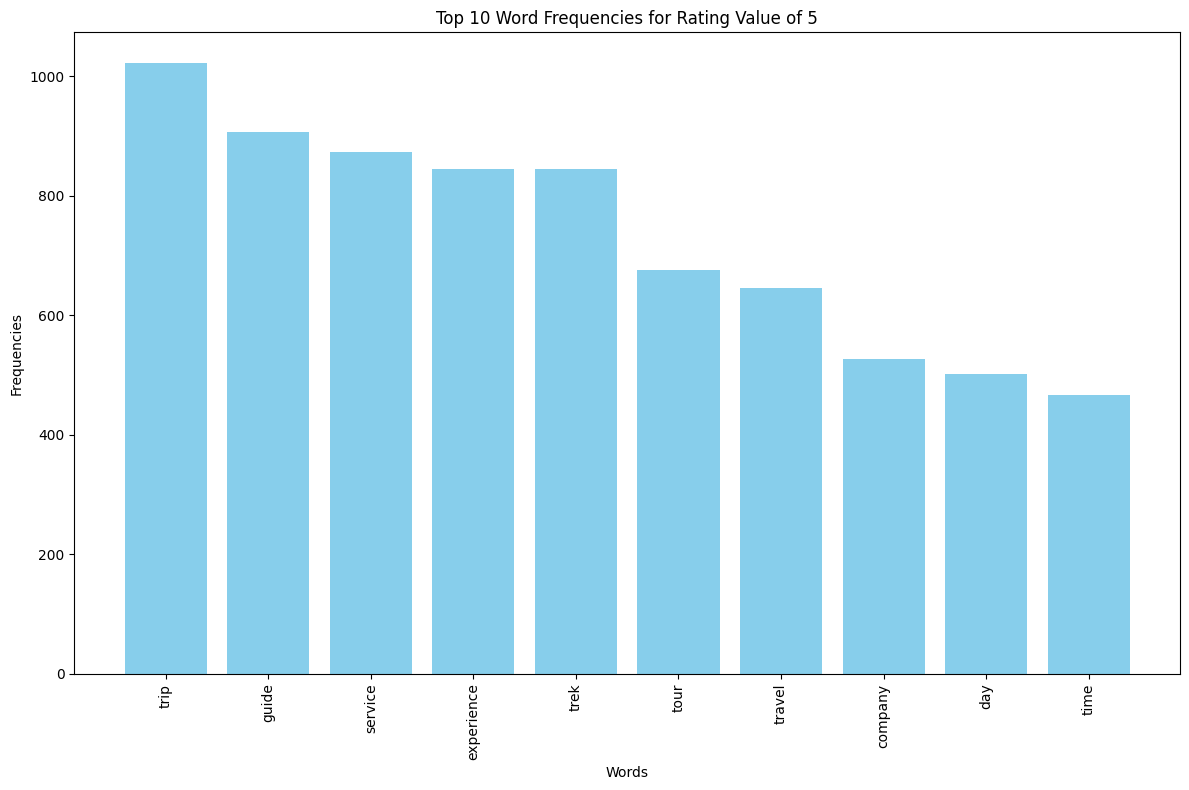

defaultdict(<class 'list'>, {'experience': ['amazing', 'good', 'unforgettable', 'unparalleled', 'amazing', 'excellent', 'memorable', 'great', 'unforgettable', 'unique', 'amazing', 'amazing', 'wonderful', 'good', 'excellent', 'amazing', 'fantastic', 'amazing', 'great', 'good', 'amazing', 'great', 'great', 'well', 'incredible', 'fantastic', 'memorable', 'good', 'great', 'good', 'good', 'remarkable', 'amazing', 'unforgettable', 'gorgeous', 'great', 'unforgettable', 'great', 'amazing', 'fantastic', 'incredible', 'wonderful', 'personal', 'great', 'amazing', 'unforgettable', 'remarkable', 'unforgettable', 'amazing', 'good', 'unforgettable', 'good', 'long', 'fantastic', 'nice', 'nice', 'unforgettable', 'amazing', 'great', 'lovely', 'outstanding', 'seamless', 'great', 'cultural', 'memorable', 'good', 'good', 'delightful', 'wonderful', 'extraordinary', 'phenomenal', 'possible', 'great', 'great', 'comfortable', 'good', 'unforgettable', 'special', 'excellent', 'pleasant', 'wonderful', 'good', 'go

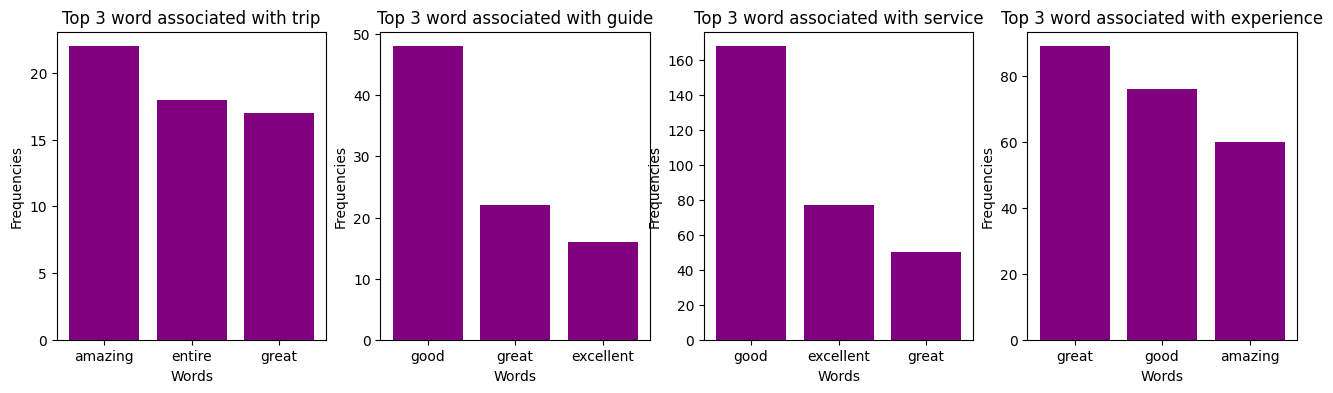

In [37]:
plots_for_all_rating(rating_text_dict, nlp, 10,rating_values=[1,2,3,4,5])